<center><h1>Capstone Project - 1005 </h1></center>

||||||
|:--|:--|:--|:--|:--|
|<span style="font-size: 24px;">[**-Group Chat-**](https://chat.whatsapp.com/HaEu6RiXKkR2MSP2UZe6bb)</span>|<span style="font-size: 24px;">[**-Meeting Link-**](meet.google.com/tin-rhdi-qpy)</span>|<span style="font-size: 24px;">[**-Capstone Website-**](https://projects.accredian.com/capstone1/login.php)</span>|<span style="font-size: 24px;">[**-Observations-**](https://docs.google.com/spreadsheets/d/1C1eAnW6pvy2OoVc_fUihWNbqMEqmpHBi/edit?usp=drivesdk&ouid=111512140113304157900&rtpof=true&sd=true)</span>|<span style="font-size: 24px;">[**-Pending Tasks-**](https://docs.google.com/document/d/1C3J_FelJwN6gXLw86JW2SlZZOUWk7gel15dvbx_nYs0/edit?usp=drivesdk)

---
    
<center><h3>Week 1 - ETL | Week 2 - EDA | Week 3 - ML | Week 4 - Dashboard</h3></center>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
    2.1 [**Project Details**](#Section21)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
    3.1 [**Installing Libraries**](#Section31)<br>
    3.2 [**Upgrading Libraries**](#Section32)<br>
    3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
    4.1 [**Data Description**](#Section41)<br>
    4.2 [**Data Information**](#Section42)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
    6.1 [**Handling Missing Values**](#Section61)<br>
    6.2 [**Handling Redundant Data & Outliers**](#Section62)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

**Company Introduction**

Our client for this project is AccredianTelecom.

- AccredianTelecom, one of the leading telecom players, understands that customizing offerings is very important for its business to stay competitive.
- Currently, AccredianTelecom is seeking to leverage behavioural data from more than 60% of the 50 million mobile devices active daily in India
- They are doing this to help their clients better understand and interact with their audiences.

**Current Scenario**

- In this consulting assignment, Accredianians are expected to build a dashboard.
- This dashboard will help us to understand a user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties
- Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts.
- These efforts are relevant to their users and cater to their preferences.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Fetch the Data onto your Python Notebook and ponder upon the challenges present in the Data.

<a name = Section21></a>
### **2.1 Project Details**

Our Role

- To help the customer the consultants are expected to have depth of clarity in the underlying data.
- How much effort has been put into cleansing and purifying the data will decide how closely have you looked at the data..
- How detailed is the observation stated in the submission report and finally, how well a group presents their consulting journey.
- Please remember that this is an analytics consulting firm. Hence, your efforts in terms of finding user behaviour are going to directly impact the company's offerings.
- Do help the company understand what is the right way forward and suggest actionable insights from marketing and product terms.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q scikit-learn
!pip install -q matplotlib seaborn
!pip install -q category_encoders
!pip install -q imbalanced-learn
!pip install -q mysql-connector

<a name = Section31></a>
### **3.2 Upgrading Libraries**

In [2]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade scikit-learn

In [3]:
# Runtime Restart Reminder

print('\n' + 'Libraries Upgraded please restart runtime')
print('\n' + '-'*45)


Libraries Upgraded please restart runtime

---------------------------------------------


<a name = Section31></a>
### **3.3 Importing Libraries**

In [4]:
import os
import mysql.connector
import re
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas.api.types import CategoricalDtype
#-------------------------------------------------------------------------------------------------------------------------------
# Configure pandas display options for better readability
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clarity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpy (For Numerical Python)
np.set_printoptions(precision=2, suppress=True)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.impute import SimpleImputer
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Importing interact for creating UI controls
import warnings                                                     # Importing warning to disable runtime warnings
import multiprocessing
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
from ydata_profiling import ProfileReport                           # Import Pandas Profiling (To generate Univariate Analysis)

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- In this assignment, we are going to study the demographics of a user (gender and age) based on their app download and usage behaviours.
- The Data is collected from mobile apps that use Inside Telecom services.
- Full recognition and consent from an individual user of those apps have been obtained, and appropriate anonymization has been performed to protect privacy.
- Due to confidentiality, we won't provide details on how the gender and age data were obtained.
- Please treat them as accurate ground truth for prediction.
- The data schema can be represented in the following table:

    - gender_age_train - Devices and their respective user gender, age and age_group
    - phone_brand_device_model - device ids, brand, and models phone_brand: note that few brands are in Chinese

- Events_data:
    
    - When a user uses mobile on an Accredian Telecom network, the event gets logged in this data.
    - Each event has an event id, location (lat/long), and the event corresponds to the frequency of mobile usage. timestamp: when the user is using the mobile.


### 4.1 Getting CWD & Listing contents

In [5]:
# List directory contents
directory = os.getcwd()  # Get the current working directory
print("Current directory:", directory)
print("Directory contents:", os.listdir(directory))

Current directory: /srv/scratch/Mihir's Approach
Directory contents: ['Analytics.gif', 'phone_brand_device_model.csv', 'Capstone MIhir Approach.ipynb', 'events_data.csv', 'Scratch.ipynb', 'sample_profile.html', '.ipynb_checkpoints', 'gender_age_train.csv', 'population_profile.html']


### 4.2 Extracting Files from remote SQL Server

In [6]:
# Connection details
cnx = mysql.connector.connect(
    host="cpanel.insaid.co",
    user="student",
    passwd="student",
    database="Capstone1"
)

# Query to retrieve table names
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = 'Capstone1'"

# Execute query and fetch results
cursor = cnx.cursor()
cursor.execute(query)
result = cursor.fetchall()

# Print table names
for table in result:
    print(table)

# Query and retrieve data from gender_age_train table
query_gender_age_train = "SELECT * FROM gender_age_train"
cursor.execute(query_gender_age_train)
table_rows = cursor.fetchall()
df_gender_age_train = pd.DataFrame(table_rows, columns=['device_id', 'gender', 'age', 'group'])

# Query and retrieve data from phone_brand_device_model table
query_phone_brand_device_model = "SELECT * FROM phone_brand_device_model"
cursor.execute(query_phone_brand_device_model)
table_rows = cursor.fetchall()
df_phone_brand_device_model = pd.DataFrame(table_rows, columns=['device_id', 'phone_brand', 'device_model'])

# Close cursor and database connection
cursor.close()
cnx.close()

('events_data',)
('gender_age_train',)
('phone_brand_device_model',)


In [7]:
# Export dataframes to CSV files
df_gender_age_train.to_csv('gender_age_train.csv', index=False)
df_phone_brand_device_model.to_csv('phone_brand_device_model.csv', index=False)

# Pulling events_data from local resources
df_events_data = pd.read_csv('events_data.csv')

In [8]:
print('Demographics of User DF Shape:', df_gender_age_train.shape)
print('Demographics of User - features:', df_gender_age_train.columns)

print('\n' + '-'*25 + '\n')

print('Device ID to phone brand Dictionary Shape:', df_phone_brand_device_model.shape)
print('Device ID to phone brand Dictionary - features:', df_phone_brand_device_model.columns)

print('\n' + '-'*25 + '\n')

print('App Download & Usage Data Shape:', df_events_data.shape)
print('App Download & Usage Data - features', df_events_data.columns)

Demographics of User DF Shape: (74645, 4)
Demographics of User - features: Index(['device_id', 'gender', 'age', 'group'], dtype='object')

-------------------------

Device ID to phone brand Dictionary Shape: (87726, 3)
Device ID to phone brand Dictionary - features: Index(['device_id', 'phone_brand', 'device_model'], dtype='object')

-------------------------

App Download & Usage Data Shape: (3252950, 7)
App Download & Usage Data - features Index(['event_id', 'device_id', 'timestamp', 'longitude', 'latitude', 'city',
       'state'],
      dtype='object')


### 4.3 Transforming & Correcting Data

We know from the problem Statement that some Phone brands are in Chinese, so we can start cleaning by correcting 'phone_brand' & 'device_model; and finding connections with 'devide_id'

In [9]:
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [10]:
df_phone_brand_device_model.describe()

,device_id
count,87726.00
mean,-5212556568047386.00
std,5330156982713830400.00
min,-9223321966609553408.00
25%,-4623331173682123776.00
50%,-31098020763804488.00
75%,4635193992006549504.00
max,9222849349208140800.00


In [11]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [12]:
df_phone_brand_device_model['phone_brand'].unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [13]:
df_phone_brand_device_model['phone_brand'] = df_phone_brand_device_model['phone_brand'].replace(to_replace = ['vivo', '小米', 'OPPO',
        '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'],
        value= ['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei', 'Qiku', 'Meizu', 'Phixun',
       'China Mobile', 'HTC', 'Tianyu', 'Supreme treasure', 'LG', 'Oboxin', 'Youmi', 'ZUK', 'Nubia', 'HP',
       'Nibiru', 'Meitu', 'Xiangmi', 'Motorola', 'Mengmi', 'Hammer', 'InFocus', 'LeTV', 'Hisense', 'Bailifeng',
       'OnePlus', 'Yuxin', 'Haier', 'Cooby', 'Newman', 'Waveguide', 'Duowei', 'Ling Yun', 'TCL', 'Cooper', 'Aipel' ,
       'LOGO', 'Scallion', 'Guomi', 'Asus', 'Onda', 'Aiuni', 'Konka', 'Yougo', 'Banghua', 'Cyber Yuhua',
       'Black Rice', 'Lovme', 'Pioneer', 'E Pie', 'Shenzhou', 'Nokia', 'Pure', 'Candied Hulu', 'Yitong', 'Ouxin',
       'Mickey', 'Cool Doo Cube', 'Blue Devil', 'Little Poplar', 'Belfeng', 'Glutinous Rice', 'Mi Song', 'Eren Eben', 'Simi', 'Big Q' ,
       'Taipower', 'Philips', 'Weimi', 'Daxian', 'Changhong', 'Vitu', 'Qingcheng', 'Original', 'Shrimp', 'Xiaxin', 'Huang',
       'Baika', 'SUGAR', 'Okey', 'Century Star', 'Chi-Mag', 'Obi', 'Kivu', 'Femtosecond', 'Desai', 'Epai',
       'Google', 'Venus Digital', 'Guangxin', 'Noahs letter', 'MIL', 'White Rice', 'Big Cola', 'Baojixun', 'Youyu', 'Shouyun',
       'Rimi', 'Rigao', 'Wopfeng', 'Mole', 'Xianmi', 'Kellytong', 'Vip', 'Owo', 'Fengmi', 'Hengyufeng',
       'Ox', 'Siemens', 'Oraldi', 'PPTV'])

In [14]:
df_phone_brand_device_model['phone_brand'].unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       'Qiku', 'Meizu', 'Phixun', 'China Mobile', 'HTC', 'Tianyu',
       'Supreme treasure', 'LG', 'Oboxin', 'Youmi', 'ZUK', 'Nubia', 'HP',
       'Nibiru', 'Meitu', 'Xiangmi', 'Motorola', 'Mengmi', 'Hammer',
       'InFocus', 'LeTV', 'Hisense', 'Bailifeng', 'OnePlus', 'Yuxin',
       'Haier', 'Cooby', 'Newman', 'Waveguide', 'Duowei', 'Ling Yun',
       'TCL', 'Cooper', 'Aipel', 'LOGO', 'Scallion', 'Guomi', 'Asus',
       'Onda', 'Aiuni', 'Konka', 'Yougo', 'Banghua', 'Cyber Yuhua',
       'Black Rice', 'Lovme', 'Pioneer', 'E Pie', 'Shenzhou', 'Nokia',
       'Pure', 'Candied Hulu', 'Yitong', 'Ouxin', 'Mickey',
       'Cool Doo Cube', 'Blue Devil', 'Little Poplar', 'Belfeng',
       'Glutinous Rice', 'Mi Song', 'Eren Eben', 'Simi', 'Big Q',
       'Taipower', 'Philips', 'Weimi', 'Daxian', 'Changhong', 'Vitu',
       'Qingcheng', 'Original', 'Shrimp', 'Xiaxin', 'Huang', 'Baika',
       'SUGAR', 'Okey', 'Century S

In [15]:
# Function to check if a string contains non-English characters
def contains_non_english(text):
    return not all(char.isascii() for char in text)

# Remove special characters and spaces from device_model column
df_phone_brand_device_model['device_model_cleaned'] = df_phone_brand_device_model['device_model'].apply(
    lambda x: re.sub(r'\W+', '', x.replace(' ', '')))

# Extract unique values with non-English characters to a list
unique_device_models = df_phone_brand_device_model['device_model_cleaned'].unique()
unique_device_models = [model for model in unique_device_models if contains_non_english(model)]

# Display the list of unique device models
print(unique_device_models)

['红米Note2', '红米Note3', '大神F1Plus', 'note顶配版', '星星1号', '红米note', '青春版', '荣耀4A', '魅蓝Note2', '荣耀7i', '荣耀畅玩4C', '红米2A', '荣耀畅玩5', '荣耀7', '红米1S', '麦芒4', '荣耀6', '荣耀畅玩4X', '荣耀3X畅玩版', '荣耀X2', '魅蓝NOTE', '荣耀6Plus', '荣耀', '荣耀畅玩4', '黄金斗士A8', '小米note', '荣耀3C', '小米4C', '红米note增强版', '天鉴W900', '荣耀畅玩5X', '红米2', '大神F1', '魅蓝2', 'Mate7青春版', '乐檬K3Note', '火星一号', '乐檬K3', '联想黄金斗士S8', '大神F2', '魅蓝', '荣耀6plus', '大神F2全高清版', '灵感XL', '旗舰版', '坚果手机', '红米', '超级手机1Pro', '畅享5', '魅蓝metal', '超级手机1', '超级手机1s', '荣耀U8860', '纽扣', '荣耀畅玩平板T1', '红辣椒X1', '春雷HD', 'ivvi小i', '荣耀畅玩4C运动版', '麦芒3', '小鲜2', '大器2', '锋尚', '大神X7', '小苹果', '乐玩', '大神Note3', '么么哒3N', '锋尚Pro', '红辣椒', '荣耀3X', '三星bigfoot', '荣耀3C畅玩版', 'ivvi小骨Pro', '红辣椒XM', '远航3', 'My布拉格', 'metal标准版', '畅享5S', '红辣椒Note', '锋尚Max', '2016版GalaxyA9', '红牛V5', '2016版GalaxyA5', '锋尚2', '金钢', '野火S', '2016版GalaxyA7', '红米3', '小辣椒X3', '荣耀平板T1823L', '大神Note', '7295A青春版', '大QNote', '么么哒', '小辣椒M2', '黄金斗士Note8', '炫影S', '风华3', 'TALK7X四核', '2016版GalaxyJ7', '天鉴T1', '土星一号', '麦芒3S', '飞马', '联想VIBEX2', '威武3'

In [16]:
df_phone_brand_device_model['device_model'] = df_phone_brand_device_model['device_model'].replace(to_replace = ['红米Note2','红米Note3','大神F1Plus','note顶配版','星星1号','红米note', '青春版','荣耀4A','魅蓝Note 2',
                        '荣耀7i','荣耀畅玩4C','红米2A','荣耀畅玩5','荣耀7',  '红米1S','麦芒4','荣耀6','荣耀畅玩4X','荣耀3X畅玩版','荣耀X2',
                        '魅蓝NOTE','荣耀6 Plus','荣耀+','荣耀畅玩4','黄金斗士A8','小米note','荣耀3C','小米4C','红米note增强版','天鉴W900', '荣耀畅玩5X',
                        '红米2','大神F1','魅蓝2','Mate 7 青春版','乐檬K3 Note','火星一号','乐檬K3', '联想黄金斗士S8','大神F2','魅蓝','荣耀6 plus','大神F2全高清版',
                        '灵感XL','旗舰版','坚果手机','红米', '超级手机1 Pro','畅享5','魅蓝metal','超级手机1','超级手机1s','荣耀U8860','纽扣','荣耀畅玩平板T1', '红辣椒 X1',
                        '春雷HD','ivvi 小i','荣耀畅玩4C运动版','麦芒3','小鲜2','大器2', '锋尚','大神X7','小苹果','乐玩','大神Note3','么么哒3N','锋尚Pro','红辣椒','荣耀3X',
                        '三星big foot','荣耀3C畅玩版','ivvi 小骨Pro', '红辣椒XM', '远航3', 'My 布拉格', 'metal 标准版', '畅享5S', '红辣椒Note', '锋尚Max', '2016版 Galaxy', '红牛V5',
                        '2016版 Galaxy', '锋尚2','金钢','野火S','2016版 Galaxy','红米3','小辣椒 X3','荣耀平板T1-','大神Note','7295A青春版','大Q Note','么么哒',
                        '小辣椒 M2','黄金斗士Note8','炫影S+','风华3','TALK 7X四核','2016版 Galaxy', '天鉴T1','土星一号', '麦芒3S','飞马','联想VIBE X2', '威武3', '红辣椒任性版',
                        '小辣椒 9', '大观4', '超级手机Max','星星2号','雷霆战机','威武3C', '倾城L3','Z9 mini 精英版','小辣椒S1', '小辣椒 5','T03锋至版','乐玩2C','么么哒3S','乐K31',
 '黄金斗士S8畅玩版','时尚手机'],
                            value= ['Redmi Note2', 'Redmi Note3', 'Great God F1Plus', 'note top version', 'Star 1', 'Redmi note',  'Youth Edition','Honor 4A','Meizu Note 2','Honor 7i','Honor Play 4C','Redmi 2A','Honor Play 5','Honor 7', 'Redmi 1S', 'Maimang 4', 'Honor 6', 'Honor Play 4X', 'Honor 3X Play Edition', 'Honor X2', 'Mei Lan NOTE', 'Honor 6 Plus',
                        'Honor+', 'Honor Play 4', 'Golden Fighter A8', 'Xiaomi Note', 'Honor 3C', 'Xiaomi 4C', 'Redmi Note Enhanced Edition', 'Tianjian W900',
                        'Honor Play 5X','Red Rice 2','Great God F1','Meizu 2','Mate 7 Youth Edition','Lemeng K3 Note','Mars One','Lemeng K3',
                        'Lenovo Gold Fighter S8', 'Dashen F2', 'Charm Blue', 'Honor 6 plus', 'Dashen F2 Full HD Version', 'Inspiration XL', 'Ultimate Edition', 'Nut Phone', 'Red Rice' ,
                        'Super Phone 1 Pro', 'Enjoy 5', 'Meizu Metal', 'Super Phone 1', 'Super Phone 1s', 'Honor U8860', 'Button', 'Honor Play Tablet T1', 'Red Pepper X1', 'Chunlei HD', 'ivvi Xiaoi', 'Honor Play 4C Sports Edition', 'Maimang 3', 'Xiaoxian 2','Big 2','Feng Shang','Great God X7','Little Apple','Have fun','Great God Note3','Momoda 3N','Fengshang Pro','Red chilli','Honor 3X','Samsung big foot','Honor 3C Play Edition','ivvi Osicles Pro', 'Red Pepper XM','voyage 3','My Prague','metal Standard Edition','Enjoy 5S','Red Pepper Note','Feng Shang Max','2016 Edition Galaxy','Red Bull V5','2016 Edition Galaxy','Feng Shang 2','Golden Steel','Wildfire S','2016 Edition Galaxy','Red Rice 3','Pepper X3','Honor Tablet T1-','Great God Note','7295A Youth Edition','Big Q Note','mwah','Pepper M2','Golden Warrior Note8', 'Hyunying S+','Fenghua 3','TALK 7X Quad Core','2016 version of Galaxy','Tianjian T1','Saturn One','Maimang 3S','Pegasus','Lenovo VIBE X2','Mighty 3','Red pepper capricious version','Pepper 9','Grand View 4','Super Phone Max','Star 2','Thunder Fighter','Mighty 3C','Allure L3','Z9 mini Elite Edition','Chili S1','Pepper 5','T03 Frontier Edition','Fun 2C','Momada 3S','Lemeng K31','Golden Fighter S8 Play Edition','Fashionable phone'])


In [17]:
# Function to check if a string contains non-English characters
def contains_non_english(text):
    return not all(char.isascii() for char in text)

# Remove special characters and spaces from device_model column
df_phone_brand_device_model['device_model_cleaned'] = df_phone_brand_device_model['device_model'].apply(
    lambda x: re.sub(r'\W+', '', x.replace(' ', '')))

# Extract unique values with non-English characters to a list
unique_device_models = df_phone_brand_device_model['device_model_cleaned'].unique()
unique_device_models = [model for model in unique_device_models if contains_non_english(model)]

# Display the list of unique device models
print(unique_device_models)

['2016版GalaxyA9', '2016版GalaxyA5', '2016版GalaxyA7', '荣耀平板T1823L', '2016版GalaxyJ7', '红辣椒任性版Plus', '乐檬K31', '大神1s', '倾城L3C', '小辣椒4', 'XperiaZ1炫彩版', '微客', '黄金斗士青春版', '红辣椒NXPlus', '小鲜3', '小星星', '大器3', '小辣椒6', '金刚II', '中兴远航3', 'Axon天机', '青漾3', '小辣椒3', '旋影90w', '小辣椒7', '醉享', '渴望HD', '小辣椒M3', '飞马3', '领世旗舰3', '小辣椒X4', '红辣椒Note3', '天鉴W808', '天鉴W900S', '大观铂顿', '魅蓝Note3', 'RazrV锋芒', '火星一号探索版', 'MotoX极', '魔镜X5', '小章鱼', '乐檬3', '乐檬X3', '飞马2Plus']


In [18]:
# Replace device_model values with their corresponding replacements
df_phone_brand_device_model['device_model'] = df_phone_brand_device_model['device_model'].replace(
    to_replace=['2016版GalaxyA9', '2016版GalaxyA5', '2016版GalaxyA7', '荣耀平板T1823L', '2016版GalaxyJ7',
                '红辣椒任性版Plus', '乐檬K31', '大神1s', '倾城L3C', '小辣椒4', 'XperiaZ1炫彩版', '微客', '黄金斗士青春版',
                '红辣椒NXPlus', '小鲜3', '小星星', '大器3', '小辣椒6', '金刚II', '中兴远航3', 'Axon天机', '青漾3',
                '小辣椒3', '旋影90w', '小辣椒7', '醉享', '渴望HD', '小辣椒M3', '飞马3', '领世旗舰3', '小辣椒X4',
                '红辣椒Note3', '天鉴W808', '天鉴W900S', '大观铂顿', '魅蓝Note3', 'RazrV锋芒', '火星一号探索版',
                'MotoX极', '魔镜X5', '小章鱼', '乐檬3', '乐檬X3', '飞马2Plus'],
    value=['GalaxyA9 2016', 'GalaxyA5 2016', 'GalaxyA7 2016', 'Honor Tablet T1823L', 'GalaxyJ7 2016',
           'Red Pepper Plus', 'Lemeng K31', 'Great God 1s', 'Qingcheng L3C', 'Little Pepper 4',
           'Xperia Z1 Colorful Edition', 'Weike', 'Golden Fighter Youth Edition', 'Red Pepper NXPlus',
           'Little Fresh 3', 'Little Star', 'Big Machine 3', 'Little Pepper 6', 'King Kong II',
           'ZTE Yuanhang 3', 'Axon', 'Qingyang 3', 'Little Pepper 3', 'Swirl Shadow 90w',
           'Little Pepper 7', 'Drunk Enjoy', 'Desire HD', 'Little Pepper M3', 'Pegasus 3',
           'Leading Flagship 3', 'Little Pepper X4', 'Red Pepper Note3', 'Tianjian W808',
           'Tianjian W900S', 'Grand View Platinum', 'Meizu Note3', 'RazrV Edge',
           'Mars One Exploration Edition', 'MotoX Extreme', 'Magic Mirror X5', 'Little Octopus',
           'Le Meng 3', 'Lemon X3', 'Pegasus 2Plus']
)

In [19]:
# Remove special characters and spaces from device_model column
df_phone_brand_device_model['device_model_cleaned'] = df_phone_brand_device_model['device_model'].apply(
    lambda x: re.sub(r'\W+', '', x.replace(' ', '')))

# Extract unique values with non-English characters to a list
unique_device_models = df_phone_brand_device_model['device_model_cleaned'].unique()
unique_device_models = [model for model in unique_device_models if contains_non_english(model)]

# Display the list of unique device models
print(unique_device_models)

['2016版GalaxyA9', '2016版GalaxyA5', '2016版GalaxyA7', '荣耀平板T1823L', '2016版GalaxyJ7', '红辣椒任性版Plus', '小辣椒4', 'XperiaZ1炫彩版', '红辣椒NXPlus', '小辣椒6', '小辣椒3', '小辣椒7', '小辣椒M3', 'RazrV锋芒', 'MotoX极', '魔镜X5', '飞马2Plus']


In [20]:
df_phone_brand_device_model.drop('device_model_cleaned', axis=1, inplace=True)

In [21]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


### Further Cleaning of 'Device ID to phone brand Dictionary'can be resumed from here

In [22]:
df_gender_age_train.describe()

,device_id,age
count,74645.00,74645.00
mean,-749135388419928.50,31.41
std,5327149733911419904.00,9.87
min,-9223067244542181376.00,1.00
25%,-4617366812584264704.00,25.00
50%,-18413620249632024.00,29.00
75%,4636655899093149696.00,36.00
max,9222849349208140800.00,96.00


In [23]:
df_gender_age_train.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

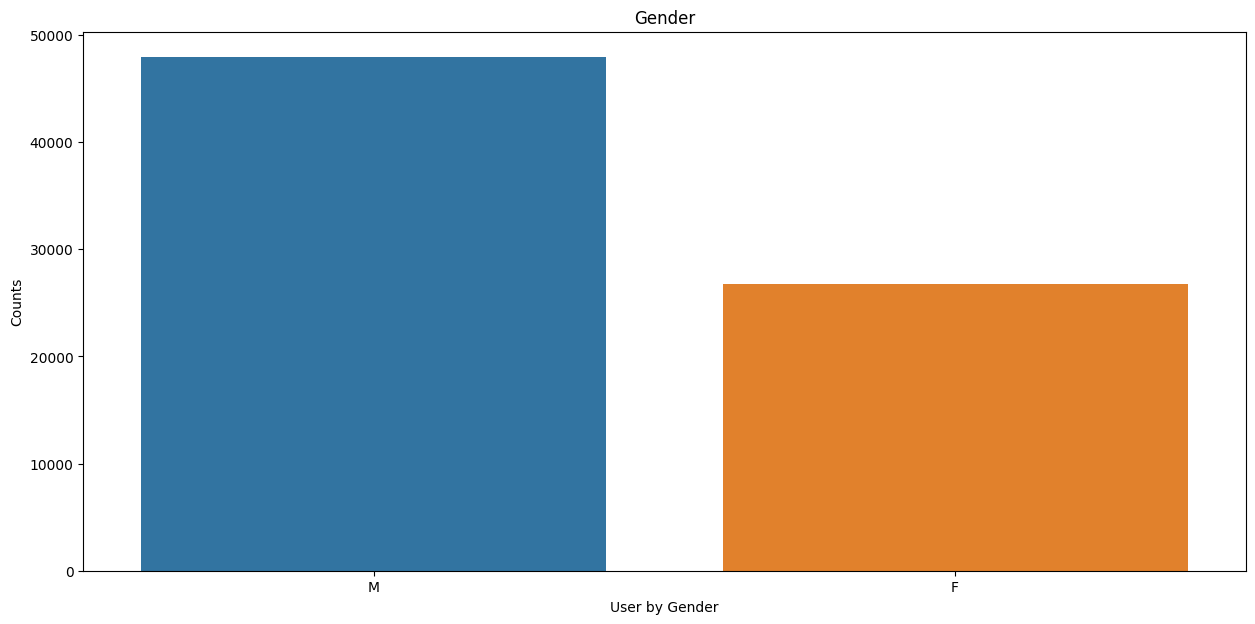

In [24]:
# Distribution of Gender in gender_age_train table
fig, ax = plt.subplots(figsize = (15,7))

sns.barplot(x =df_gender_age_train['gender'].value_counts().keys(), y=df_gender_age_train['gender'].value_counts())
plt.xlabel('User by Gender')
plt.ylabel('Counts')
plt.title('Gender')
plt.show()

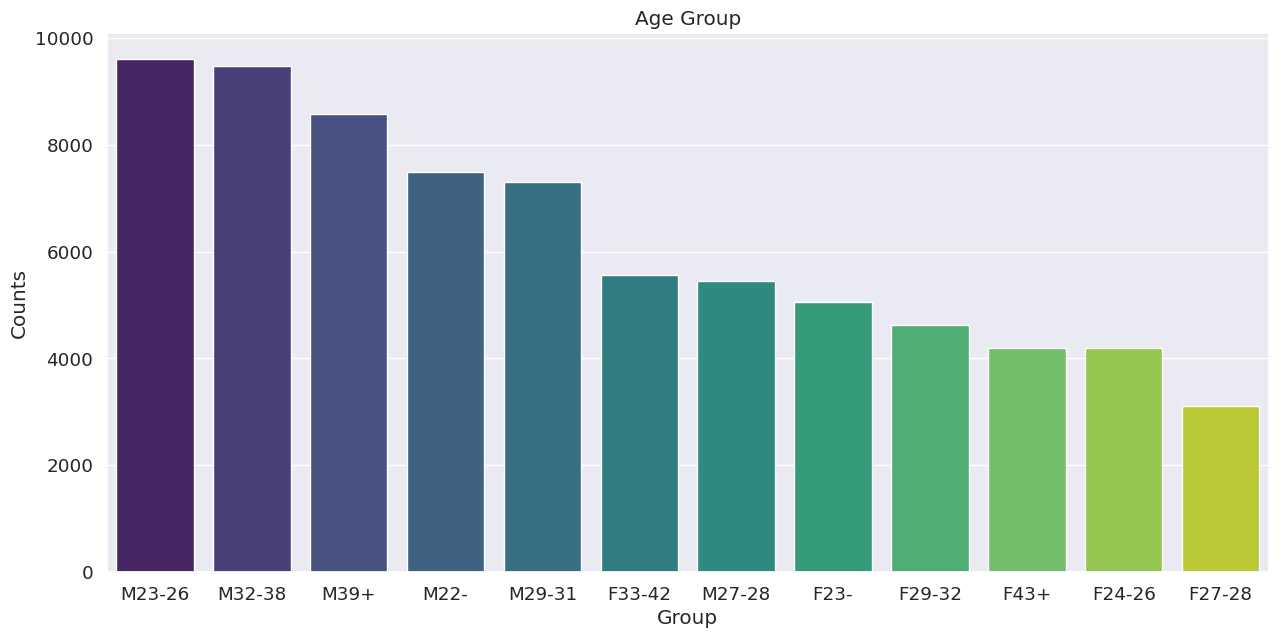

In [25]:
# Set font sizes
plt.rcParams.update({'font.size': 14})
sns.set(font_scale=1.2)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the bar chart with viridis color map
sns.barplot(x=df_gender_age_train['group'].value_counts().keys(),
            y=df_gender_age_train['group'].value_counts(), ax=ax, palette='viridis')

# Set the labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Counts')
ax.set_title('Age Group')

# Display the plot
plt.show()

In [26]:
# Generate the crosstab
crosstab = pd.crosstab(df_gender_age_train['gender'], df_gender_age_train['group'])

crosstab

group,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
gender,,,,,,,,,,,,
F,5050,4190,3118,4628,5561,4194,0,0,0,0,0,0
M,0,0,0,0,0,0,7488,9605,5445,7309,9476,8581


### Observations

- Among the female population in the dataset, the most represented age group is 'F33-42' with a count of 5561, indicating a relatively higher number of females in their thirties and forties. This is followed by the age group 'F43+' with a count of 4194, suggesting a significant presence of older females.

- Among the male population in the dataset, the most represented age group is 'M23-26' with a count of 9605, indicating a higher number of males in their early to mid-twenties. The second most represented age group is 'M29-31' with a count of 9476, suggesting a considerable presence of males in their late twenties to early thirties.

- It is interesting to note that there are no individuals in the dataset falling under the age group categories 'M22-' or 'M27-28' for males. This absence is evident from the counts of 0 in the crosstab, indicating that there are no males in the dataset belonging to these age groups.

In [27]:
df_events_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304.00,2016-05-07 22:52:05,77.23,28.73,Delhi,Delhi
1,2955066,4734221357723754496.00,2016-05-01 20:44:16,88.39,22.66,Calcutta,WestBengal
2,605968,-3264499652692492800.00,2016-05-02 14:23:04,77.26,28.76,Delhi,Delhi
3,448114,5731369272434022400.00,2016-05-03 13:21:16,80.34,13.15,Chennai,TamilNadu
4,665740,338888002570799936.00,2016-05-06 03:51:05,86.00,23.84,Bokaro,Jharkhand


In [28]:
df_events_data.describe()

,event_id,device_id,longitude,latitude
count,3252950.00,3252497.00,3252527.00,3252527.00
mean,1626475.50,101220009585530976.00,78.16,21.69
std,939045.92,5316758188197361664.00,4.24,5.79
min,1.00,-9222956879900150784.00,12.57,8.19
25%,813238.25,-4540611333857475072.00,75.84,17.80
50%,1626475.50,172682011159278816.00,77.27,22.16
75%,2439712.75,4861813234983622656.00,80.32,28.68
max,3252950.00,9222849349208140800.00,95.46,41.87


In [29]:
df_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [30]:
#Converting the timestamp datatype to Datetime format.

df_events_data["timestamp"] = pd.to_datetime(df_events_data["timestamp"])

In [31]:
#Converting the negative device id to positive value

df_events_data["device_id"] = abs(df_events_data["device_id"])
df_gender_age_train['device_id'] = abs(df_gender_age_train['device_id'])
df_phone_brand_device_model['device_id'] = abs(df_phone_brand_device_model['device_id'])

In [32]:
df_events_data.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

### Imputing missing Values in State using City Details

In [33]:
# Create a dictionary using the existing 'state' and 'city' values
state_city_dict = df_events_data.dropna(subset=['state']).set_index('city')['state'].to_dict()

# Start timing the operation
%time df_events_data['state'] = df_events_data.apply(lambda row: state_city_dict[row['city']] if pd.isnull(row['state']) else row['state'], axis=1)

# Check for null values in 'state' after imputation
print("Null Counts after imputation:")
print(df_events_data.isnull().sum())

CPU times: user 20.1 s, sys: 470 ms, total: 20.6 s
Wall time: 20.6 s
Null Counts after imputation:
event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64


### Imputing other missing values with KNN Inputer

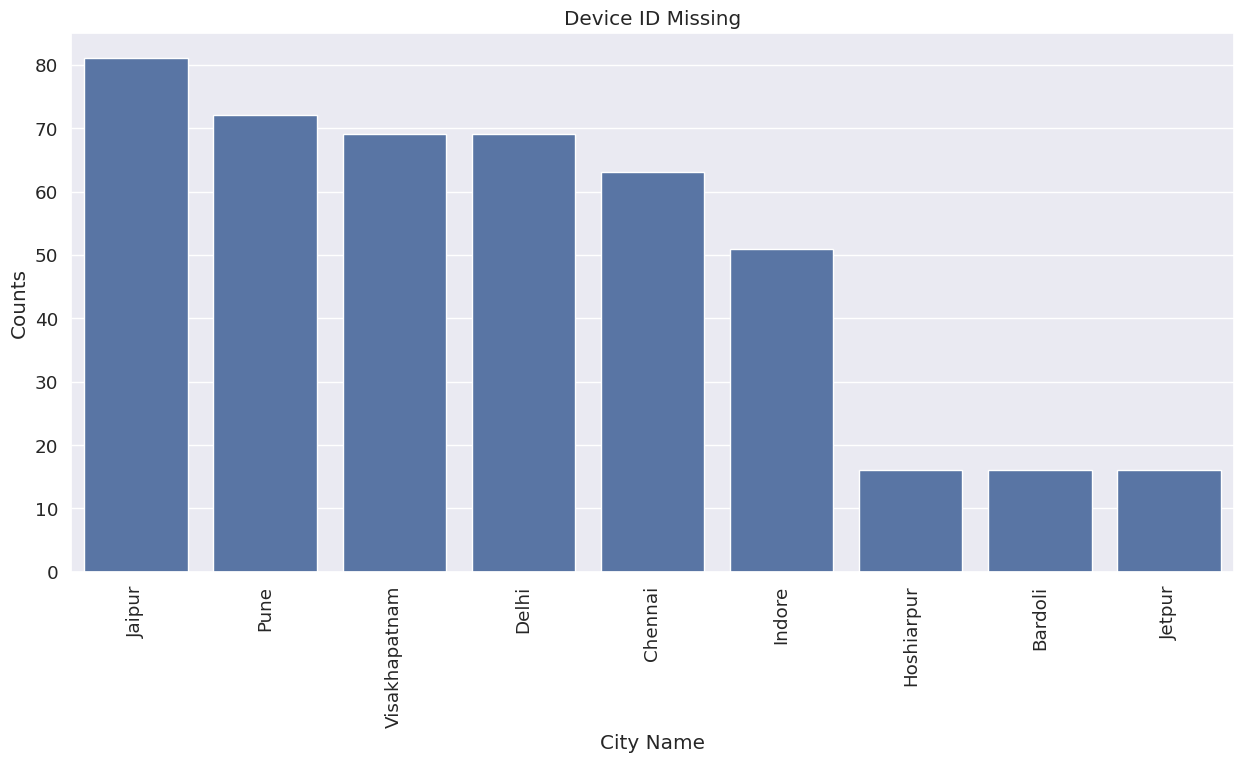

In [34]:
# Filling missing 'device_id'
device_id_null = df_events_data[df_events_data['device_id'].isna()]

# Plotting the count of missing 'device_id' by city
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=device_id_null['city'].value_counts().keys(), y=device_id_null['city'].value_counts(), color='b')
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Device ID Missing')
plt.show()

In [35]:
# Imputing missing values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_data = imputer.fit_transform(df_events_data[['event_id', 'device_id', 'longitude', 'latitude']])

# Creating a new DataFrame with imputed values
events_data_imputed = pd.DataFrame(data=imputed_data, columns=["event_id", "device_id", "longitude", "latitude"])

# Merging the imputed DataFrame with the original DataFrame
df_events_data = pd.merge(df_events_data, events_data_imputed, on='event_id')
df_events_data.drop(['device_id_x', 'latitude_x', 'longitude_x'], axis=1, inplace=True)
df_events_data.rename(columns={'device_id_y': 'device_id', 'longitude_y': 'longitude', 'latitude_y': 'latitude'}, inplace=True)

# Checking for missing values
df_events_data.isna().sum()

event_id     0
timestamp    0
city         0
state        0
device_id    0
longitude    0
latitude     0
dtype: int64

### Further Cleaning of 'App Download & Usage Data' can be resumed form here

### Merging all Dataframes

In [36]:
# Merge phone_brand_device_model with events_data
merged_df = df_events_data.merge(df_phone_brand_device_model, on='device_id', how='left')

# Merge gender_age_train with merged_df
final_df = merged_df.merge(df_gender_age_train, on='device_id', how='left')

# Display the final merged dataframe
print('Merged events data Shape:', final_df.shape)

Merged events data Shape: (3252950, 12)


In [37]:
# Making a copy of the Dataset incase it needs to be reffered back to
data = final_df.copy(deep=True)

In [38]:
num_duplicates = data.duplicated().sum()
data = data.drop_duplicates()
print(f"Number of duplicates dropped: {num_duplicates}")

Number of duplicates dropped: 0


In [39]:
data.head()

,event_id,timestamp,city,state,device_id,longitude,latitude,phone_brand,device_model,gender,age,group
0,2765368,2016-05-07 22:52:05,Delhi,Delhi,2973347786994914304.00,77.23,28.73,Youmi,UIMI3,M,35.00,M32-38
1,2955066,2016-05-01 20:44:16,Calcutta,WestBengal,4734221357723754496.00,88.39,22.66,NaN,NaN,NaN,NaN,NaN
2,605968,2016-05-02 14:23:04,Delhi,Delhi,3264499652692492800.00,77.26,28.76,NaN,NaN,NaN,NaN,NaN
3,448114,2016-05-03 13:21:16,Chennai,TamilNadu,5731369272434022400.00,80.34,13.15,NaN,NaN,NaN,NaN,NaN
4,665740,2016-05-06 03:51:05,Bokaro,Jharkhand,338888002570799936.00,86.00,23.84,NaN,NaN,NaN,NaN,NaN


<a name = Section42></a>
### **4.1 Data Description**

In [40]:
data.describe()

,event_id,device_id,longitude,latitude,age
count,3252950.00,3252950.00,3252950.00,3252950.00,16982.00
mean,1626475.50,4618037363952840704.00,78.16,21.69,32.43
std,939045.92,2636705934955177472.00,4.24,5.79,9.16
min,1.00,50366114458478.00,12.57,8.19,10.00
25%,813238.25,2351760739866812928.00,75.84,17.80,26.00
50%,1626475.50,4715122614813775872.00,77.27,22.16,30.00
75%,2439712.75,6843267178917308416.00,80.32,28.68,36.00
max,3252950.00,9222956879900150784.00,95.46,41.87,79.00


<a name = Section42></a>
### **4.2 Data Information**

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event_id      int64         
 1   timestamp     datetime64[ns]
 2   city          object        
 3   state         object        
 4   device_id     float64       
 5   longitude     float64       
 6   latitude      float64       
 7   phone_brand   object        
 8   device_model  object        
 9   gender        object        
 10  age           float64       
 11  group         object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 322.6+ MB


In [42]:
data.isnull().sum()

event_id              0
timestamp             0
city                  0
state                 0
device_id             0
longitude             0
latitude              0
phone_brand     3235968
device_model    3235968
gender          3235968
age             3235968
group           3235968
dtype: int64

In [43]:
data = data.drop('device_id', axis=1)

In [44]:
# Extracting Categorical & Numerical columns to perform further analysis & cleaning
categorical_cols = data.select_dtypes('object').columns
numerical_cols = data.select_dtypes(['int', 'float']).columns

# Checking Unique Values and Null Counts in Dataset by taking a sample and displaying a few unique values
print('\n' + 'Having a look at unique values and null counts in each column')
print('\n' + '-'*50 + '\n')

for col in data.columns:
    unique_vals = data[col].unique()
    num_unique = len(unique_vals)
    null_count = data[col].isnull().sum()

    print("Column Name: {}\n".format(col))
    if col in categorical_cols:
        print("Data Type: Categorical | Unique Values: {} | Null Count: {}\n".format(num_unique, null_count))
        print(unique_vals[:])
    else:
        print("Data Type: Numerical | Unique Values: {} | Null Count: {}\n".format(num_unique, null_count))
        print(data[col].sample(300).unique()[:10])

    print('\n' + '-'*70 + '\n')


Having a look at unique values and null counts in each column

--------------------------------------------------

Column Name: event_id

Data Type: Numerical | Unique Values: 3252950 | Null Count: 0

[1190573  684228  749461 2880819  887723 1812971  441599  278368 2724300
 1322477]

----------------------------------------------------------------------

Column Name: timestamp

Data Type: Numerical | Unique Values: 588126 | Null Count: 0

['2016-05-05T11:12:08.000000000' '2016-05-01T10:06:13.000000000'
 '2016-05-06T08:40:01.000000000' '2016-05-01T06:44:57.000000000'
 '2016-05-03T15:00:49.000000000' '2016-05-04T06:49:15.000000000'
 '2016-05-02T05:14:38.000000000' '2016-05-02T21:07:03.000000000'
 '2016-05-07T15:02:44.000000000' '2016-05-04T13:48:43.000000000']

----------------------------------------------------------------------

Column Name: city

Data Type: Categorical | Unique Values: 933 | Null Count: 0

['Delhi' 'Calcutta' 'Chennai' 'Bokaro' 'Visakhapatnam' 'Wanparti' 'Mumbai'
 '

### Observation

1. Missing Values: The data contains a significant number of missing values, particularly in columns such as 'phone_brand', 'device_model', 'gender', 'age', and 'group'. These missing values need to be addressed to ensure the integrity of the data and to facilitate further analysis.

2. Data Imbalance: The distribution of gender and age groups in the dataset is likely to be imbalanced, as indicated by the count of non-null values for 'gender' and 'age' being much lower than the total number of entries. This imbalance can impact the performance and accuracy of any models or analyses conducted on the data.

### Resolution Approach:

1. Handling Missing Values: The missing values in the dataset can be resolved through various imputation techniques. For categorical variables like 'phone_brand', 'device_model', 'gender', and 'group', missing values can be replaced with an appropriate category or labeled as 'Unknown'. For numerical variables like 'age', missing values can be imputed using techniques such as mean, median, or regression-based imputation.

2. Addressing Data Imbalance: To address data imbalance, techniques like oversampling (e.g., SMOTE) or undersampling can be applied to balance the distribution of gender and age groups. 

3. Exploratory Data Analysis (EDA): By conducting exploratory data analysis, patterns, trends, and relationships within the available data can be explored. EDA techniques such as visualizations, summary statistics, and hypothesis testing can provide insights into the relationships between gender, age, and app download/usage behaviors.

---
<a name = Section5></a>
# **5. Population Profiling**
---

In [45]:
# Detailed Profile Report of Population Data for univariate analysis & training model

profile = ProfileReport(df=data)

print('\n' + '-'*40 + '\n')
print('Population profile Report Generated')
print('\n' + '-'*40 + '\n')


----------------------------------------

Population profile Report Generated

----------------------------------------



In [46]:
# Loading profile report to file for record keeping

profile.to_file("population_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### States assigned to our team for the Project

- Madhya Pradesh
- Chhattisgarh
- Uttaranchal
- Jammu & Kashmir
- Goa
- Nagaland

In [47]:
# Create a list of states to focus on
states_to_focus = ['MadhyaPradesh', 'Chhattisgarh', 'Uttaranchal', 'JammuandKashmir', 'Goa', 'Nagaland']

# Filter the dataframe based on the 'state' column
sample_df = data[data['state'].isin(states_to_focus)]

# Print the shape of the original dataframe
print('Original Data Shape:', data.shape)

# Print the shape of the filtered dataframe
print('Filtered Data Shape:', sample_df.shape)

# Calculate the count of entries deleted from the dataset
entries_deleted = data.shape[0] - sample_df.shape[0]

# Print the count of entries deleted
print('Entries Deleted:', entries_deleted)

Original Data Shape: (3252950, 11)
Filtered Data Shape: (261148, 11)
Entries Deleted: 2991802


---
<a name = Section6></a>
# **6. Sample Profiling**
---

In [48]:
# Profile Report of Sample Dataset

profile = ProfileReport(df=sample_df)

print('\n' + '-'*40 + '\n')
print('Sample profile Report Generated')
print('\n' + '-'*40 + '\n')


----------------------------------------

Sample profile Report Generated

----------------------------------------



In [49]:
# Loading profile report to file for record keeping

profile.to_file("sample_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations:

1. Missing Values: The dataset has a significant number of missing values, particularly in columns such as 'phone_brand', 'device_model', 'gender', 'age', and 'group'. These missing values need to be addressed to ensure data integrity.

2. Data Imbalance: The distribution of 'city' and 'state' variables is highly imbalanced, with some values dominating the dataset. This could impact the analysis and modeling.

3. High Cardinality: The 'city' column has a high cardinality with 85 distinct values. This could potentially affect certain analysis or modeling techniques.

4. High Correlations: Several variables, such as 'longitude', 'latitude', 'age', 'phone_brand', 'device_model', 'gender', and 'group', exhibit high correlations with other variables. This indicates potential multicollinearity and could influence the performance of certain models.

### Resolution Approaches:

1. Handling Missing Values: Since 'phone_brand', 'device_model', 'gender', 'age', and 'group' have a high percentage of missing values, appropriate imputation techniques need to be applied. For categorical variables ('phone_brand', 'device_model', 'gender', 'group'), missing values can be replaced with a category such as 'Unknown'. For numerical variables ('age'), techniques like mean, median, or regression-based imputation can be used.

2. Addressing Data Imbalance: The imbalanced distribution of 'city' and 'state' variables can be addressed using techniques like oversampling (e.g., SMOTE) or undersampling to balance the dataset. This will help prevent bias and improve model performance.

3. Handling High Cardinality: When dealing with high cardinality in the 'city' column, it may be necessary to apply dimensionality reduction techniques or consider aggregating the data based on higher-level geographical categories.

4. Addressing High Correlations: High correlations among variables like 'longitude', 'latitude', 'age', 'phone_brand', 'device_model', 'gender', and 'group' could lead to multicollinearity issues. Feature selection techniques, such as using correlation matrices, variance inflation factor (VIF), or dimensionality reduction methods like principal component analysis (PCA), can help identify and handle highly correlated variables.

By implementing these resolution approaches, the data can be prepared for further analysis, modeling, and visualization, while ensuring the integrity and quality of the insights obtained.

---
<a name = Section7></a>
# **7. Exploratory Data Analysis**
---

<a name = Section71></a>
### **7.1 How many Events occured in each City?**

<a name = Section82></a>
### **8.2 How many events (Date-wise)?**

### 7.3 How many Models/ Brand of Phone?

In [52]:
for brand, group in df_phone_brand_device_model.groupby('phone_brand'):
    print("Phone Brand: {}\n".format(brand))
    print(group['device_model'].unique())
    print('\n' + '-'*70 + '\n')

Phone Brand: Aipel

['IPH8' 'iPh-800']

----------------------------------------------------------------------

Phone Brand: Aiuni

['U3' 'U2' 'i1']

----------------------------------------------------------------------

Phone Brand: Asus

['ZenFone Max' 'ZenFone 2' 'ZenFone 5' 'ME371MG' 'Pegasus' 'Pegasus 3'
 'K012' 'T00G' 'ME7510KG' 'ZenFone Selfie' '飞马2 Plus']

----------------------------------------------------------------------

Phone Brand: Baika

['V6']

----------------------------------------------------------------------

Phone Brand: Bailifeng

['T708' 'T2']

----------------------------------------------------------------------

Phone Brand: Banghua

['U11' 'U7' 'TL1000' 'V9' 'V95' 'TL500' 'V70' 'U1' 'I6']

----------------------------------------------------------------------

Phone Brand: Baojixun

['JX8166']

----------------------------------------------------------------------

Phone Brand: Belfeng

['BF T18' 'T12' 'BF A500' 'T13']

----------------------------------